# __<div align="center">EDP : TP2 - Intégration temporelle</div>__

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### __1. Schéma d'Euler explicite__

#### __1.1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d'Euler explicite__

In [2]:
def FOUEE_u_i_nplus1(rien, u_i_n, u_imoinsun_n, rien2, C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

def UPO2VF_EE_u_i_nplus1(u_iplusun_n, u_i_n, u_imoinsun_n, u_imoinsdeux_n, C):
    return u_i_n - (C/4)*(u_iplusun_n + 3*u_i_n - 5*u_imoinsun_n + u_imoinsdeux_n)

#### __1.2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schémas ?__

In [3]:
C_liste = [0.1, 0.5, 1]

In [4]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m

a = 1       # a = 1m/s

T = 1
deltax = L/m

deltaT_liste = [C_liste[i]*deltax/a for i in range(len(C_liste))]
p_liste = [int(T/deltaT_liste[i]) for i in range(len(deltaT_liste))]

abscisse = np.linspace(0,L,m)


def CI(x,x0):
    return x > x0

u0 = np.vectorize(CI)(abscisse,x0)

##### __1.2.1. FOU__

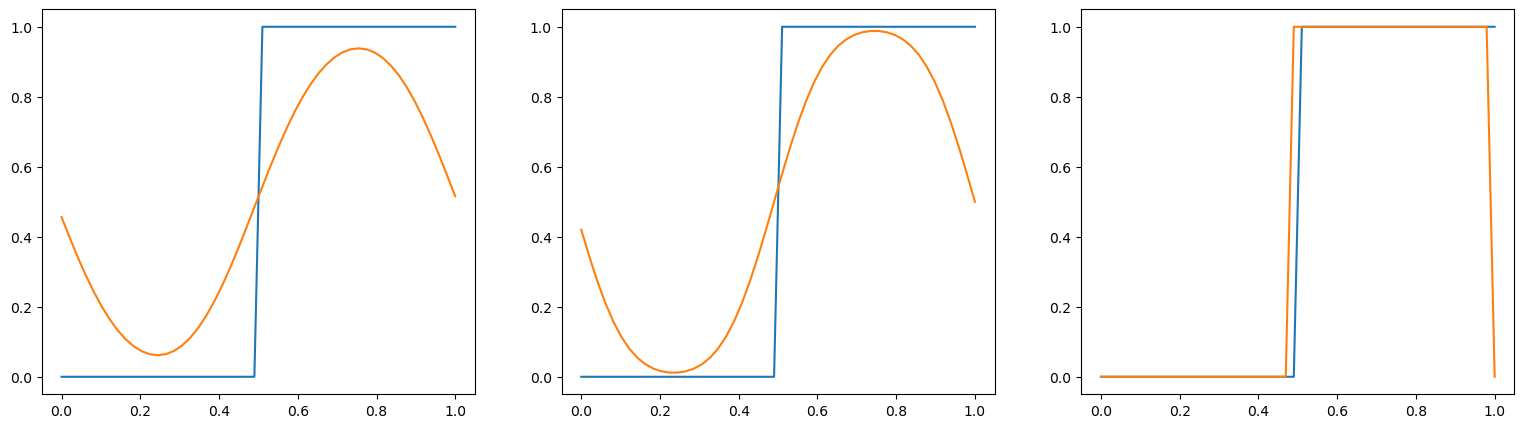

In [5]:
plt.figure(figsize=(19, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_FOUEE = np.zeros((m,p_liste[k]))
    grille_temps_espace_FOUEE[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_FOUEE[i,n] = FOUEE_u_i_nplus1(None, grille_temps_espace_FOUEE[i,n - 1], grille_temps_espace_FOUEE[i - 1,n - 1], None, C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,0])

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,-1])

##### __1.2.2. UPO2VF__

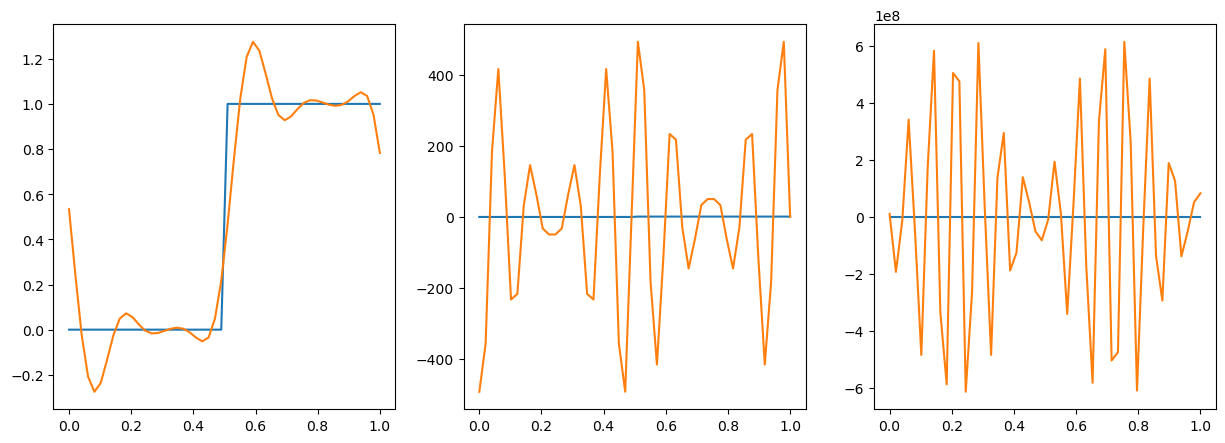

In [26]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_UPO2VF = np.zeros((m,p_liste[k]))
    grille_temps_espace_UPO2VF[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_UPO2VF[i,n] = UPO2VF_EE_u_i_nplus1(grille_temps_espace_UPO2VF[(i + 1)%m,n - 1], grille_temps_espace_UPO2VF[i,n - 1], grille_temps_espace_UPO2VF[i - 1,n - 1], grille_temps_espace_UPO2VF[i - 2,n - 1], C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,0])

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,-1])

### __2. Schéma de Runge Kutta explicite d'ordre 2__

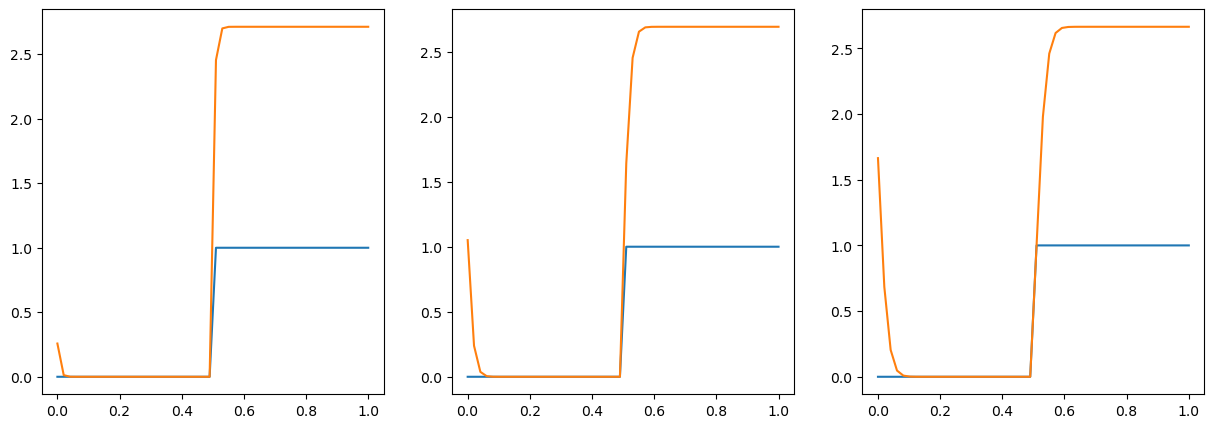

In [32]:
def RKexpl2_deltaU_etoile(u_n, C, schema):
    deltaU_etoile_n = np.zeros(len(u_n))
    for i in range(len(u_n)) :
        #deltaU_etoile_n[i] = u_n[i] - (C/4)*(u_n[(i+1)%len(u_n)] + 3*u_n[i] - 5*u_n[i - 1] + u_n[i - 2])
        deltaU_etoile_n[i] = schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C)
    return np.array(deltaU_etoile_n)

# -> Fonctionnement verifié

def RKexpl2_U_etoile(u_n, dt, C, schema):
    #return u_n + dt*deltaU_etoile
    return np.array(u_n) + dt*RKexpl2_deltaU_etoile(u_n, C, schema)

def RKexpl2_deltaU(u_n, dt, C, schema):
    deltaU_n = np.zeros(len(u_n))
    #for i in range(len(u_n)) :
        #deltaU_n[1,i] = UPO2VF_EE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    
    
    #deltaU_n = (1/2)*RKexpl2_deltaU_etoile(RKexpl2_U_etoile(u_n, dt, C), C) + (1/2)*RKexpl2_deltaU_etoile(u_n, C)
    
    
    #deltaU_n[1,i] = FOUEE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    
    U_etoile = RKexpl2_U_etoile(u_n, dt, C, schema)
    
    for i in range(len(u_n)) :
        deltaU_n[i] = (1/2)*schema(U_etoile[(i+1)%len(U_etoile)], U_etoile[i], U_etoile[i - 1], U_etoile[i - 2], C) + (1/2)*schema(u_n[(i+1)%len(u_n)], u_n[i], u_n[i - 1], u_n[i - 2], C)
    return np.array(deltaU_n)
    #return deltaU_n


def RKexpl2_U_nplusun(u_n, dt, C, schema):
    return u_n + dt*RKexpl2_deltaU(u_n, dt, C, schema)


plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :

        # CHOISIR LE SCHEMA EN REMPLACANT LE DERNIER ARGUMENT CI-DESSOUS
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_U_nplusun(grille_temps_espace_RKexpl2[:,n-1], deltaT_liste[k], C_liste[k], FOUEE_u_i_nplus1)

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

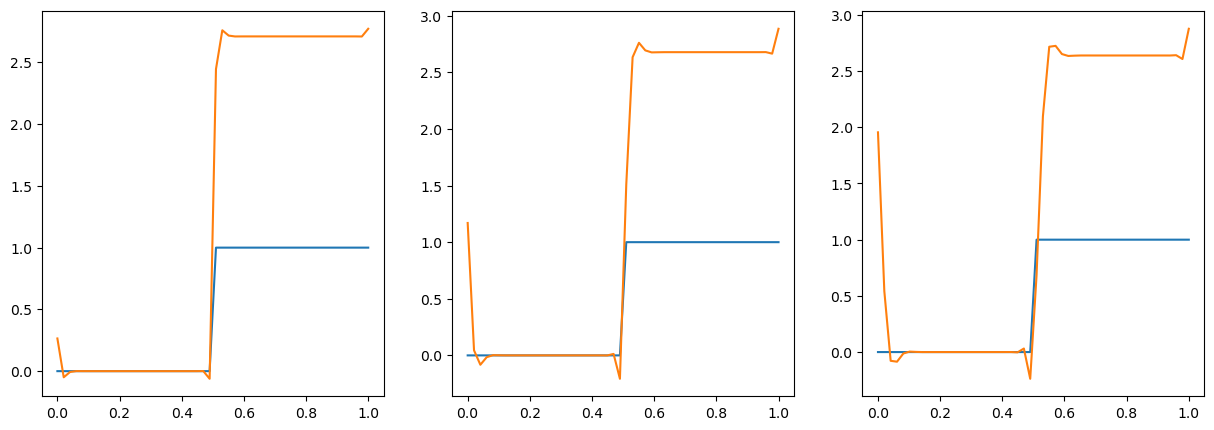

In [31]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u0)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_U_etoile(grille_temps_espace_RKexpl2[:,n-1], deltaT_liste[k], C_liste[k], UPO2VF_EE_u_i_nplus1)

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

### __3. Schéma d'Euler implicite__

In [ ]:
def Eulerimp_deltaU(u_nplusun, C, schema):
    return np.array(schema(u_nplusun[(i+1)%len(u_nplusun)], u_nplusun[i], u_nplusun[i - 1], u_nplusun[i - 2], C))

def Eulerimp_U_nplusun(u_n, deltaU, dt, C, schema):
    return np.array(u_n + dt*deltaU)